# Trying CNN 

In [1]:
import torch
import pandas as pd
import numpy as np
import torchvision
from torchvision import transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim


from Network import *
from TorchMalaria import *

import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
data = DataMalaria("list_of_imagenames_with_label.csv", transform=torchvision.transforms.ToTensor())

C:\Users\simcha\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


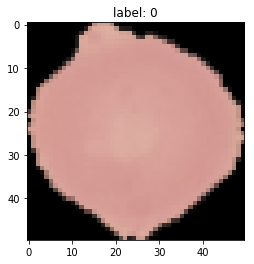

In [3]:
image, label = data[0]
data.imshowsingle(0)

C:\Users\simcha\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\simcha\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


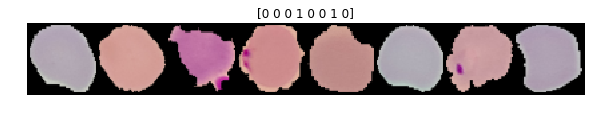

In [6]:
dataloader = DataLoader(data, batch_size = 8, shuffle = True)
dataIter = iter(dataloader)

batch = next(dataIter)
images, labels = batch

# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images)
fig = plt.figure(figsize=(10, 80))
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy())
plt.show()

In [8]:
# initialize network and optimizer
network = Network()
optimizer = optim.Adam(network.parameters(), lr = 0.01)

batch = next(iter(dataloader))
images, labels = batch

# forward pass + calculate loss
preds = network(images)
loss = F.cross_entropy(preds, labels)

# backward propagation + updating weights
loss.backward()
optimizer.step()

################################

print("Loss 1: {}".format(loss.item()))
preds = network(images)
loss = F.cross_entropy(preds, labels)
print("Loss 2: {}".format(loss.item()))

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'weight'

In [9]:
network(image.type(torch.DoubleTensor).unsqueeze(0))

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'weight'